# Select LVs
Having 200 LVs is way more manageable than tens of thousands of genes, but that's still a lot of hypotheses to test. Inspired by the discussion section of the MultiPLIER paper, we'll filter out the LVs with low variance in the target dataset under the hypothesis that they are more likely to be reflective of non-brain biology.

In [1]:
import pandas as pd

In [2]:
lv_df = pd.read_csv('../output/NAc_PFC_VTA_LVs.txt', sep='\t')
# Drop information about the individual samples and shuffle to avoid subconcious bias
lv_df = lv_df.drop('sample', axis='columns')
lv_df = lv_df.sample(frac=1).reset_index(drop=True)

In [3]:
lv_df

,LV0,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,...,LV174,LV175,LV176,LV177,LV178,LV179,LV180,LV181,LV182,LV183
0,-0.095699,0.003913,-0.039398,0.001692,-0.011280,-0.031027,-0.031718,-0.014408,-0.155771,-0.001714,...,-0.037397,0.056235,-0.014987,0.185477,0.088410,0.041896,0.006052,-0.047019,-0.020932,-0.001781
1,-0.057362,-0.048683,-0.029281,-0.020893,-0.034357,-0.004770,-0.100495,-0.013009,-0.316634,-0.014874,...,-0.036563,0.010044,-0.025334,0.032669,0.048112,0.011123,-0.001267,-0.035649,-0.011238,-0.024651
2,0.157013,0.027018,0.033791,0.020708,0.024534,0.072706,0.027470,0.012002,0.232068,0.016889,...,0.060883,-0.018020,0.042705,-0.038801,-0.033898,-0.012019,0.009942,0.054234,0.039112,0.013216
3,0.046846,0.009010,0.045632,0.023844,0.008499,-0.022243,0.043096,-0.005782,0.271049,-0.009240,...,0.050073,-0.023556,0.050431,-0.062773,-0.034493,-0.010446,0.011230,0.025469,-0.012090,-0.009988
4,-0.086316,-0.010977,-0.013504,-0.019425,0.003666,-0.003110,-0.000565,-0.011531,0.145757,-0.002666,...,0.012229,-0.062241,-0.006137,-0.033392,-0.015384,-0.033954,-0.009719,0.022171,-0.015305,-0.027520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-0.085840,-0.018682,-0.046456,-0.012883,-0.017982,-0.027498,-0.022069,-0.015646,-0.277361,-0.004429,...,-0.048215,0.073411,-0.033521,0.114074,0.022764,0.017046,0.000505,-0.055724,-0.035038,-0.007065
106,0.219184,-0.007899,0.066195,0.033412,0.000980,-0.019535,0.104612,0.009902,0.039510,-0.005500,...,-0.011634,0.015641,0.028944,-0.119692,-0.027311,0.003139,0.008334,0.016648,0.041757,0.031550
107,-0.082627,0.001546,-0.023428,-0.015059,0.013221,-0.011315,0.044434,0.003101,0.252276,0.006560,...,0.000565,0.006847,-0.011793,-0.061944,-0.062474,-0.009176,-0.014792,-0.002774,-0.033840,-0.010510
108,-0.097193,0.000432,-0.027420,-0.003767,0.003437,-0.025611,-0.023005,-0.018233,-0.101633,-0.011874,...,-0.042904,0.047910,-0.022590,0.103779,0.035996,0.024275,-0.005355,-0.043432,-0.032007,-0.016460


### Distribution of LV variances

<AxesSubplot:>

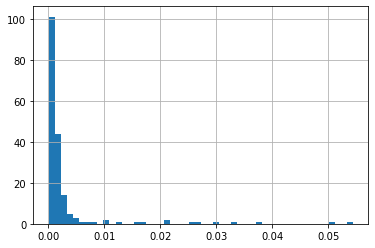

In [4]:
lv_df.var().hist(bins=50)

There seems to be a cut point between the body of the distribution and its tail at a variance of .01. We'll keep the most variable LVs (those above .01) for the analysis.

In [5]:
lvs_to_keep = lv_df.loc[:,lv_df.var() > .01].columns

## Save results

In [6]:
lv_df = pd.read_csv('../output/NAc_PFC_VTA_LVs.txt', sep='\t')
lv_df = lv_df.set_index('sample')
lv_df = lv_df.loc[:,lvs_to_keep]
lv_df.to_csv('../output/high_variance_lvs.tsv', sep='\t')